# 0. Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import random as rnd
import plotly.express as px 

from sklearn import datasets
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.svm import SVC

import datetime

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

sns.set(rc={"figure.dpi":100, 'savefig.dpi':300})
sns.set_context('notebook')
sns.set_style("ticks")
from IPython.display import set_matplotlib_formats
%config InlineBackend.figure_format = 'retina'
plt.style.use('tableau-colorblind10')

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# 1. Dataset

In [3]:
compiled = pd.read_csv('Gurugram_Hourly_Compiled.csv')

/var/folders/27/b03t8q596qvcmtyqjtnh0w6w0000gn/T/ipykernel_71542/219756349.py:1: DtypeWarning: Columns (1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,25,26,27,30) have mixed types. Specify dtype option on import or set low_memory=False.
  compiled = pd.read_csv('Gurugram_Hourly_Compiled.csv')


In [4]:
compiled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147531 entries, 0 to 147530
Data columns (total 31 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Datetime     147531 non-null  object 
 1   Station      107273 non-null  object 
 2   PM2.5        141387 non-null  object 
 3   NO           140785 non-null  object 
 4   NO2          141476 non-null  object 
 5   NOx          134829 non-null  object 
 6   SO2          112070 non-null  object 
 7   CO           142368 non-null  object 
 8   Ozone        107273 non-null  object 
 9   Benzene      108032 non-null  object 
 10  Toluene      104172 non-null  object 
 11  Eth-Benzene  80457 non-null   object 
 12  MP-Xylene    80457 non-null   object 
 13  O            26816 non-null   object 
 14  Temp         26816 non-null   object 
 15  RH           80457 non-null   object 
 16  WS           53641 non-null   object 
 17  WD           80457 non-null   object 
 18  SR           80457 non-n

#### Convert object to float and string

In [5]:
schema = {
    "Datetime": str,
    "Station": str,
    "PM2.5": np.float64,
    "NO": np.float64,
    "NO2": np.float64,
    "NOx": np.float64,
    "SO2": np.float64,
    "CO": np.float64,
    "Ozone": np.float64,
    "Benzene": np.float64,
    "Toluene": np.float64,
    "Eth-Benzene": np.float64,
    "MP-Xylene": np.float64,
    "O": np.float64,
    "Temp": np.float64,
    "RH": np.float64,
    "WS": np.float64,
    "WD": np.float64,
    "SR": np.float64,
    "BP": np.float64,
    "VWS": np.float64,
    "Xylene": np.float64,
    "AT": np.float64,
    "RF": np.float64,
    "TOT-RF": np.float64,
    "PM10": np.float64,
    "NH3": np.float64,
    "CO2": np.float64,
    "O3": np.float64,
    "AQI": np.float64,
    "AQI_Bucket": str
}
compiled 

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0          04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62   10.5   
1          04-03-2020 01:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2          04-03-2020 02:00  Vikas Sadan  63.33  302.33  40.26  262.69    7.6   
3          04-03-2020 03:00  Vikas Sadan   67.6  377.93  29.18  317.53  10.53   
4          04-03-2020 04:00  Vikas Sadan  72.72   319.8  33.66  273.25   9.98   
...                     ...          ...    ...     ...    ...     ...    ...   
147526  2020-06-30 20:00:00          NaN  54.74    6.23  10.67    12.6   4.18   
147527  2020-06-30 21:00:00          NaN  54.37     6.3  10.28   11.88   4.03   
147528  2020-06-30 22:00:00          NaN  50.34    6.93  10.36   13.01   6.17   
147529  2020-06-30 23:00:00          NaN  53.23    6.64   10.3   12.75   6.31   
147530  2020-07-01 00:00:00          NaN  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone Benzene  ... Xylene    AT    RF TOT-RF    PM10   NH3  CO2  \
0       3.01   5.08    2.04  ...    3.1  None  None    0.0     NaN   NaN  NaN   
1       5.38   6.15       2  ...   3.03  None  None    0.0     NaN   NaN  NaN   
2       1.85  12.72    2.02  ...   3.08  None  None    0.0     NaN   NaN  NaN   
3       1.31  11.46    1.96  ...   3.02  None  None    0.0     NaN   NaN  NaN   
4       0.63   4.76    2.01  ...   2.97  None  None    0.0     NaN   NaN  NaN   
...      ...    ...     ...  ...    ...   ...   ...    ...     ...   ...  ...   
147526   0.6    NaN    2.14  ...    4.7   NaN   NaN    NaN  135.42  2.95  NaN   
147527   1.2    NaN    1.87  ...   4.29   NaN   NaN    NaN  136.11  3.47  NaN   
147528   1.0    NaN    2.41  ...   4.59   NaN   NaN    NaN  147.32  3.76  NaN   
147529  0.86    NaN    2.54  ...   4.61   NaN   NaN    NaN  163.15  3.36  NaN   
147530  1.11    NaN    2.67  ...   4.73   NaN   NaN    NaN  174.08  2.91  NaN   

           O3    AQI AQI_Bucket  
0         NaN    NaN        NaN  
1         NaN    NaN        NaN  
2         NaN    NaN        NaN  
3         NaN    NaN        NaN  
4         NaN    NaN        NaN  
...       ...    ...        ...  
147526  70.95  154.0   Moderate  
147527  55.13  154.0   Moderate  
147528  42.60  155.0   Moderate  
147529  35.61  156.0   Moderate  
147530  44.14  157.0   Moderate  

[147531 rows x 31 columns]

In [6]:
# We have None in columns.

compiled.replace(to_replace=['None'], value=np.nan, inplace=True)
compiled

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0          04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62   10.5   
1          04-03-2020 01:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2          04-03-2020 02:00  Vikas Sadan  63.33  302.33  40.26  262.69    7.6   
3          04-03-2020 03:00  Vikas Sadan   67.6  377.93  29.18  317.53  10.53   
4          04-03-2020 04:00  Vikas Sadan  72.72   319.8  33.66  273.25   9.98   
...                     ...          ...    ...     ...    ...     ...    ...   
147526  2020-06-30 20:00:00          NaN  54.74    6.23  10.67    12.6   4.18   
147527  2020-06-30 21:00:00          NaN  54.37     6.3  10.28   11.88   4.03   
147528  2020-06-30 22:00:00          NaN  50.34    6.93  10.36   13.01   6.17   
147529  2020-06-30 23:00:00          NaN  53.23    6.64   10.3   12.75   6.31   
147530  2020-07-01 00:00:00          NaN  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone Benzene  ... Xylene   AT   RF TOT-RF    PM10   NH3 CO2  \
0       3.01   5.08    2.04  ...    3.1  NaN  NaN    0.0     NaN   NaN NaN   
1       5.38   6.15       2  ...   3.03  NaN  NaN    0.0     NaN   NaN NaN   
2       1.85  12.72    2.02  ...   3.08  NaN  NaN    0.0     NaN   NaN NaN   
3       1.31  11.46    1.96  ...   3.02  NaN  NaN    0.0     NaN   NaN NaN   
4       0.63   4.76    2.01  ...   2.97  NaN  NaN    0.0     NaN   NaN NaN   
...      ...    ...     ...  ...    ...  ...  ...    ...     ...   ...  ..   
147526   0.6    NaN    2.14  ...    4.7  NaN  NaN    NaN  135.42  2.95 NaN   
147527   1.2    NaN    1.87  ...   4.29  NaN  NaN    NaN  136.11  3.47 NaN   
147528   1.0    NaN    2.41  ...   4.59  NaN  NaN    NaN  147.32  3.76 NaN   
147529  0.86    NaN    2.54  ...   4.61  NaN  NaN    NaN  163.15  3.36 NaN   
147530  1.11    NaN    2.67  ...   4.73  NaN  NaN    NaN  174.08  2.91 NaN   

           O3    AQI AQI_Bucket  
0         NaN    NaN        NaN  
1         NaN    NaN        NaN  
2         NaN    NaN        NaN  
3         NaN    NaN        NaN  
4         NaN    NaN        NaN  
...       ...    ...        ...  
147526  70.95  154.0   Moderate  
147527  55.13  154.0   Moderate  
147528  42.60  155.0   Moderate  
147529  35.61  156.0   Moderate  
147530  44.14  157.0   Moderate  

[147531 rows x 31 columns]

In [7]:
compiled.dtypes
compiled = compiled.astype(schema)
compiled.dtypes

Datetime        object
Station         object
PM2.5           object
NO              object
NO2             object
NOx             object
SO2             object
CO              object
Ozone           object
Benzene         object
Toluene         object
Eth-Benzene     object
MP-Xylene       object
O               object
Temp            object
RH              object
WS              object
WD              object
SR              object
BP              object
VWS             object
Xylene          object
AT              object
RF              object
TOT-RF         float64
PM10            object
NH3             object
CO2            float64
O3             float64
AQI            float64
AQI_Bucket      object
dtype: object

Datetime        object
Station         object
PM2.5          float64
NO             float64
NO2            float64
NOx            float64
SO2            float64
CO             float64
Ozone          float64
Benzene        float64
Toluene        float64
Eth-Benzene    float64
MP-Xylene      float64
O              float64
Temp           float64
RH             float64
WS             float64
WD             float64
SR             float64
BP             float64
VWS            float64
Xylene         float64
AT             float64
RF             float64
TOT-RF         float64
PM10           float64
NH3            float64
CO2            float64
O3             float64
AQI            float64
AQI_Bucket      object
dtype: object

In [8]:
compiled['Station'].value_counts(dropna=False)
compiled['Station'].isna().sum() # This gave 0, so nan is not treated as NaN. Convert it

nan            40258
Sector 51      26825
Vikas Sadan    26816
NISE           26816
Teri Gram      26816
Name: Station, dtype: int64

0

In [9]:
compiled['Station'].replace(to_replace=['nan'], value="No Station", inplace=True)
compiled

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0          04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62  10.50   
1          04-03-2020 01:00  Vikas Sadan  56.88  177.38  56.39  170.94   5.64   
2          04-03-2020 02:00  Vikas Sadan  63.33  302.33  40.26  262.69   7.60   
3          04-03-2020 03:00  Vikas Sadan  67.60  377.93  29.18  317.53  10.53   
4          04-03-2020 04:00  Vikas Sadan  72.72  319.80  33.66  273.25   9.98   
...                     ...          ...    ...     ...    ...     ...    ...   
147526  2020-06-30 20:00:00   No Station  54.74    6.23  10.67   12.60   4.18   
147527  2020-06-30 21:00:00   No Station  54.37    6.30  10.28   11.88   4.03   
147528  2020-06-30 22:00:00   No Station  50.34    6.93  10.36   13.01   6.17   
147529  2020-06-30 23:00:00   No Station  53.23    6.64  10.30   12.75   6.31   
147530  2020-07-01 00:00:00   No Station  61.64    5.99  10.58   12.37   7.57   

          CO  Ozone  Benzene  ...  Xylene  AT  RF  TOT-RF    PM10   NH3  CO2  \
0       3.01   5.08     2.04  ...    3.10 NaN NaN     0.0     NaN   NaN  NaN   
1       5.38   6.15     2.00  ...    3.03 NaN NaN     0.0     NaN   NaN  NaN   
2       1.85  12.72     2.02  ...    3.08 NaN NaN     0.0     NaN   NaN  NaN   
3       1.31  11.46     1.96  ...    3.02 NaN NaN     0.0     NaN   NaN  NaN   
4       0.63   4.76     2.01  ...    2.97 NaN NaN     0.0     NaN   NaN  NaN   
...      ...    ...      ...  ...     ...  ..  ..     ...     ...   ...  ...   
147526  0.60    NaN     2.14  ...    4.70 NaN NaN     NaN  135.42  2.95  NaN   
147527  1.20    NaN     1.87  ...    4.29 NaN NaN     NaN  136.11  3.47  NaN   
147528  1.00    NaN     2.41  ...    4.59 NaN NaN     NaN  147.32  3.76  NaN   
147529  0.86    NaN     2.54  ...    4.61 NaN NaN     NaN  163.15  3.36  NaN   
147530  1.11    NaN     2.67  ...    4.73 NaN NaN     NaN  174.08  2.91  NaN   

           O3    AQI  AQI_Bucket  
0         NaN    NaN         nan  
1         NaN    NaN         nan  
2         NaN    NaN         nan  
3         NaN    NaN         nan  
4         NaN    NaN         nan  
...       ...    ...         ...  
147526  70.95  154.0    Moderate  
147527  55.13  154.0    Moderate  
147528  42.60  155.0    Moderate  
147529  35.61  156.0    Moderate  
147530  44.14  157.0    Moderate  

[147531 rows x 31 columns]

In [10]:
compiled['Station'].unique()

array(['Vikas Sadan', 'Sector 51', 'NISE', 'Teri Gram', 'No Station'],
      dtype=object)

#### Now, we have the data ready to plot the missing values.

In [11]:
px.bar(compiled.groupby(
    ['Station']).apply(lambda x: x.isnull().sum() + (x == "None").sum() ).T,
       text_auto=True,
       title='Total missing values by station',
       labels={
           "x": "Column",
           "y": "Count"
       })

In [12]:
compiled.groupby(
    ['Station']).apply(lambda x: x.isnull().sum() + (x == "None").sum() ).T

Station       NISE  No Station  Sector 51  Teri Gram  Vikas Sadan
Datetime         0           0          0          0            0
Station          0           0          0          0            0
PM2.5         3156        6144       1218       1702         5037
NO            2143        6746       2140       1515         4899
NO2           2142        6055       1308       1524         4889
NOx           2138       12702        425        269         4781
SO2          26816        8645        733       2231         5571
CO            2148        5163        311        233         4849
Ozone         2083       40258        719        667         5872
Benzene      26816       12683      11007        427         4581
Toluene      26816       16543      11034        434         4577
Eth-Benzene  26816       40258      13920       1167         4780
MP-Xylene    26816       40258        760       1448         4779
O            26816       40258      26825      26816         4600
Temp         26816       40258      26825      26816         4594
RH           26816       40258       1573       1025         4598
WS           26816       40258        333        609        26816
WD           26816       40258      10898        606         4597
SR           26816       40258       5737      15389         4596
BP           26816       40258      26825      26816         5000
VWS          26816       40258      26825      26816         4596
Xylene       26816       37441      13788       5871         4577
AT           26816       40258       1096       1095        26816
RF           26798       40258        216      26626        11826
TOT-RF           0       40258          0          0            0
PM10          2944       23708       1337       1557        26816
NH3          26816       37536       1315       4362        26816
CO2          26816       40258      26825      26816        26816
O3           26816        5465      26825      26816        26816
AQI          26816        6838      26825      26816        26816
AQI_Bucket       0           0          0          0            0

#### Seeing the percentage

In [13]:
px.bar(compiled.groupby(['Station']).apply(lambda x: round((
    (x.isnull().sum() + (x == "None").sum()) / compiled.shape[0]) * 100, 2)).T,
       text_auto=True,
       title='% of missing values by station',
       labels={
           "x": "Column",
           "y": "Percentage"
       })

### Let us explore SO2 column

In [14]:
compiled['SO2'].describe()

count    103535.000000
mean          7.818233
std           9.874812
min           0.010000
25%           2.490000
50%           4.960000
75%           9.310000
max         199.370000
Name: SO2, dtype: float64

#### The 75% value is 9.31 and max is 199. So, there are lots of outliers. Checking them below

In [15]:
compiled[compiled['SO2'] >= 9.31]

Datetime      Station  PM2.5      NO    NO2     NOx    SO2  \
0          04-03-2020 00:00  Vikas Sadan  60.92  141.22  61.53  144.62  10.50   
3          04-03-2020 03:00  Vikas Sadan  67.60  377.93  29.18  317.53  10.53   
4          04-03-2020 04:00  Vikas Sadan  72.72  319.80  33.66  273.25   9.98   
5          04-03-2020 05:00  Vikas Sadan  75.97  263.58  26.00  224.17  12.04   
6          04-03-2020 06:00  Vikas Sadan  76.28  222.80  27.10  192.04  12.20   
...                     ...          ...    ...     ...    ...     ...    ...   
147512  2020-06-30 06:00:00   No Station  30.48    6.78   9.59   12.32   9.34   
147513  2020-06-30 07:00:00   No Station  31.90    6.88   9.74   12.14   9.85   
147518  2020-06-30 12:00:00   No Station  52.91    5.57  11.47   11.10  12.15   
147521  2020-06-30 15:00:00   No Station  61.14    4.98  12.24   10.83  10.16   
147524  2020-06-30 18:00:00   No Station  47.34    4.93  11.86   11.20  12.04   

          CO  Ozone  Benzene  ...  Xylene  AT  RF  TOT-RF    PM10   NH3  CO2  \
0       3.01   5.08     2.04  ...    3.10 NaN NaN     0.0     NaN   NaN  NaN   
3       1.31  11.46     1.96  ...    3.02 NaN NaN     0.0     NaN   NaN  NaN   
4       0.63   4.76     2.01  ...    2.97 NaN NaN     0.0     NaN   NaN  NaN   
5       1.31   5.08     2.00  ...    2.95 NaN NaN     0.0     NaN   NaN  NaN   
6       0.07   4.27     2.02  ...    2.96 NaN NaN     0.0     NaN   NaN  NaN   
...      ...    ...      ...  ...     ...  ..  ..     ...     ...   ...  ...   
147512  0.42    NaN     2.68  ...    5.07 NaN NaN     NaN  112.91  3.53  NaN   
147513  0.53    NaN     2.67  ...    5.12 NaN NaN     NaN  120.28  3.52  NaN   
147518  1.27    NaN     2.16  ...    4.96 NaN NaN     NaN   95.70  3.72  NaN   
147521  0.54    NaN     1.96  ...    4.56 NaN NaN     NaN   79.83  2.98  NaN   
147524  2.03    NaN     2.04  ...    4.93 NaN NaN     NaN  104.84  3.31  NaN   

            O3    AQI  AQI_Bucket  
0          NaN    NaN         nan  
3          NaN    NaN         nan  
4          NaN    NaN         nan  
5          NaN    NaN         nan  
6          NaN    NaN         nan  
...        ...    ...         ...  
147512   33.54  116.0    Moderate  
147513   16.52  115.0    Moderate  
147518   67.36  128.0    Moderate  
147521  113.45  137.0    Moderate  
147524  111.69  154.0    Moderate  

[25898 rows x 31 columns]

In [16]:
# >75% is 9.31. It is 17.5 % of the data.

(compiled[compiled['SO2'] >= 9.31].shape[0] / compiled.shape[0]) * 100

17.554276728280836

#### Drawing boxplot & histogram for visualization

<AxesSubplot: xlabel='SO2'>

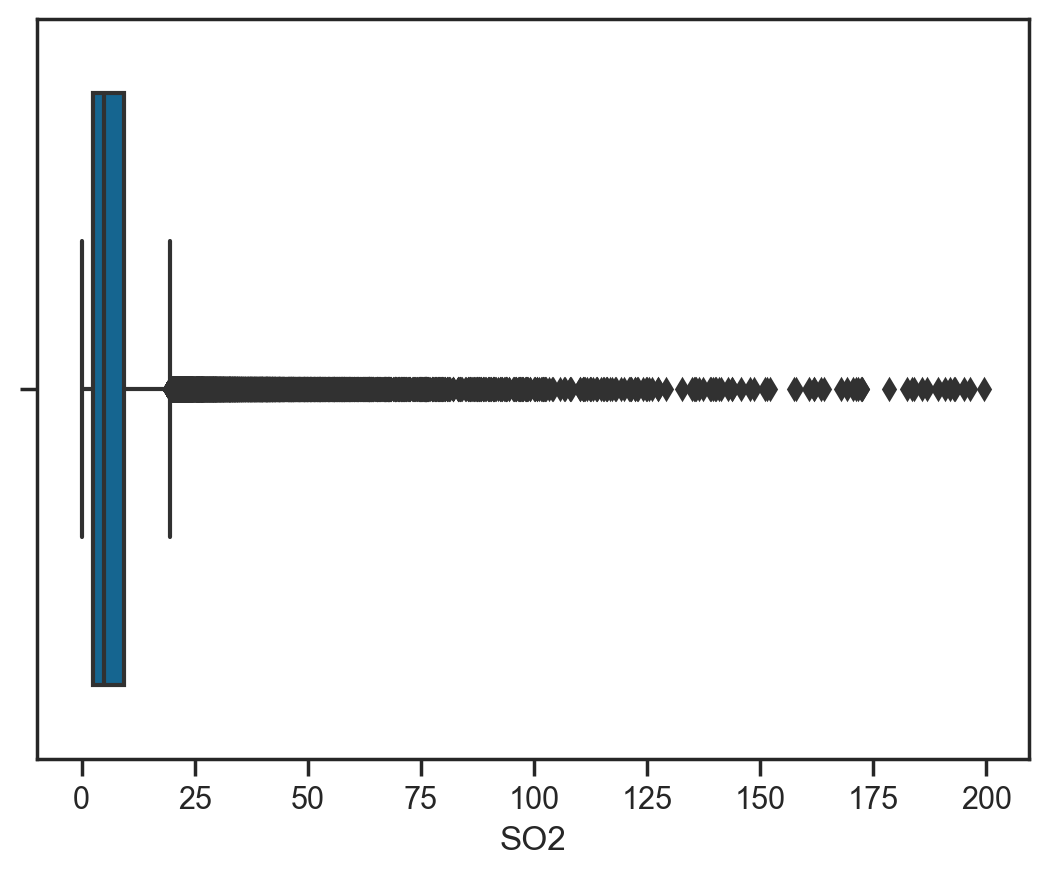

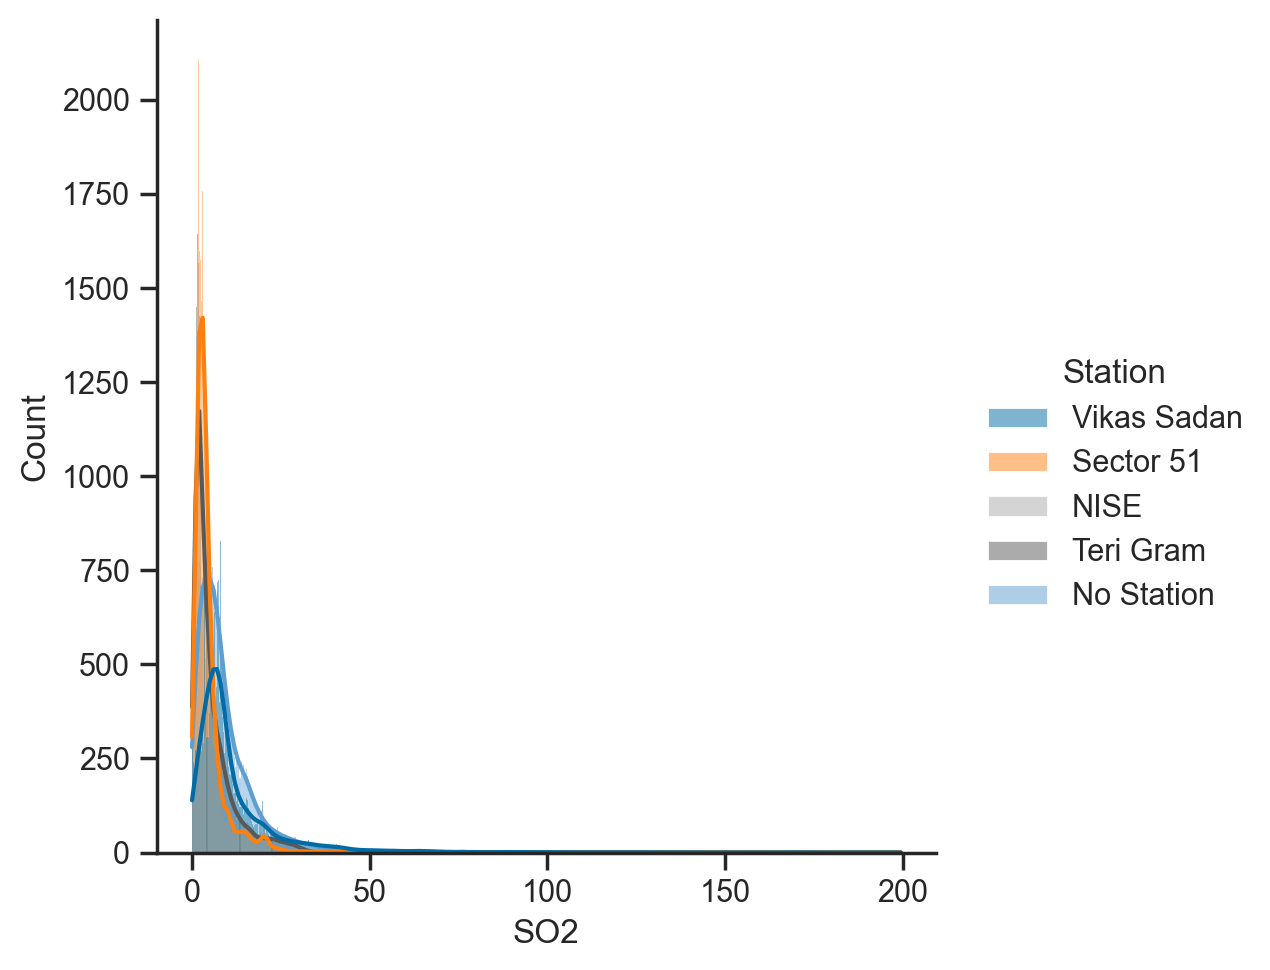

In [17]:
sns.boxplot(data = compiled, x='SO2')
sns.displot(data = compiled, x='SO2', kde=True, hue='Station')

- #### The data is highly skewed to right and has lots of outliers (17.5% of the data)
- #### Plotting below the 75%

<AxesSubplot: xlabel='SO2'>

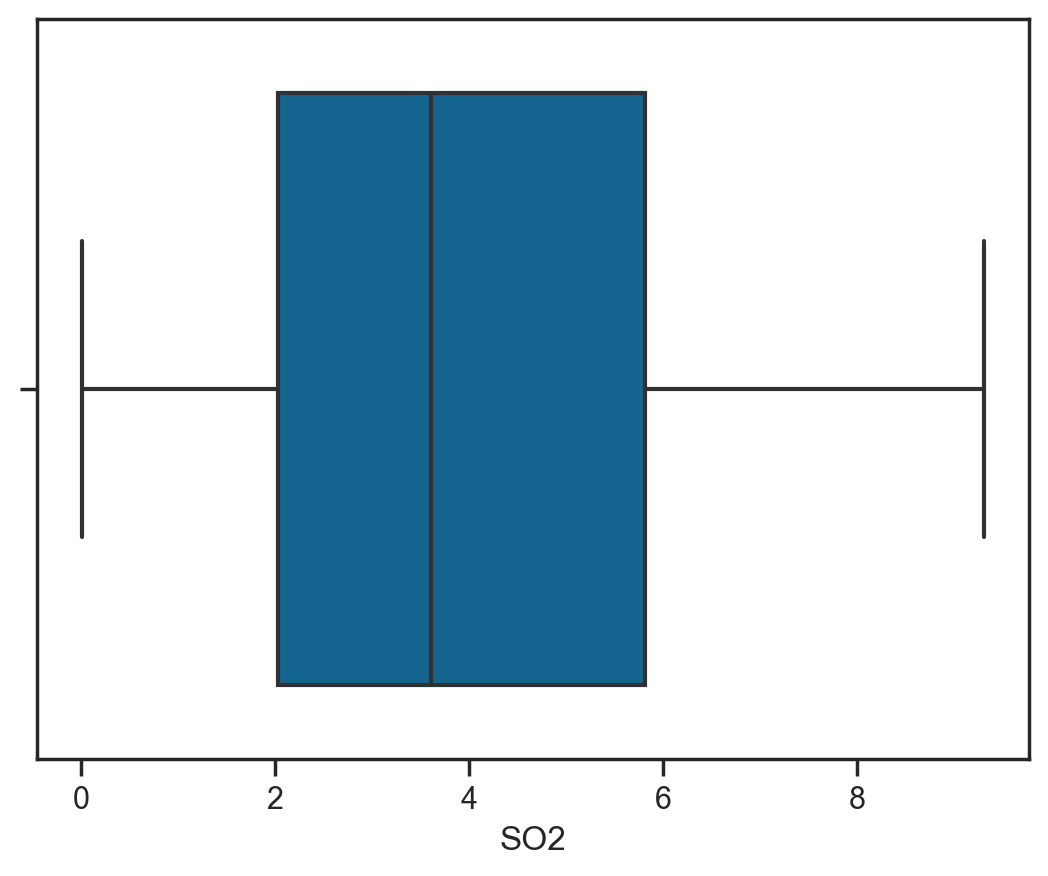

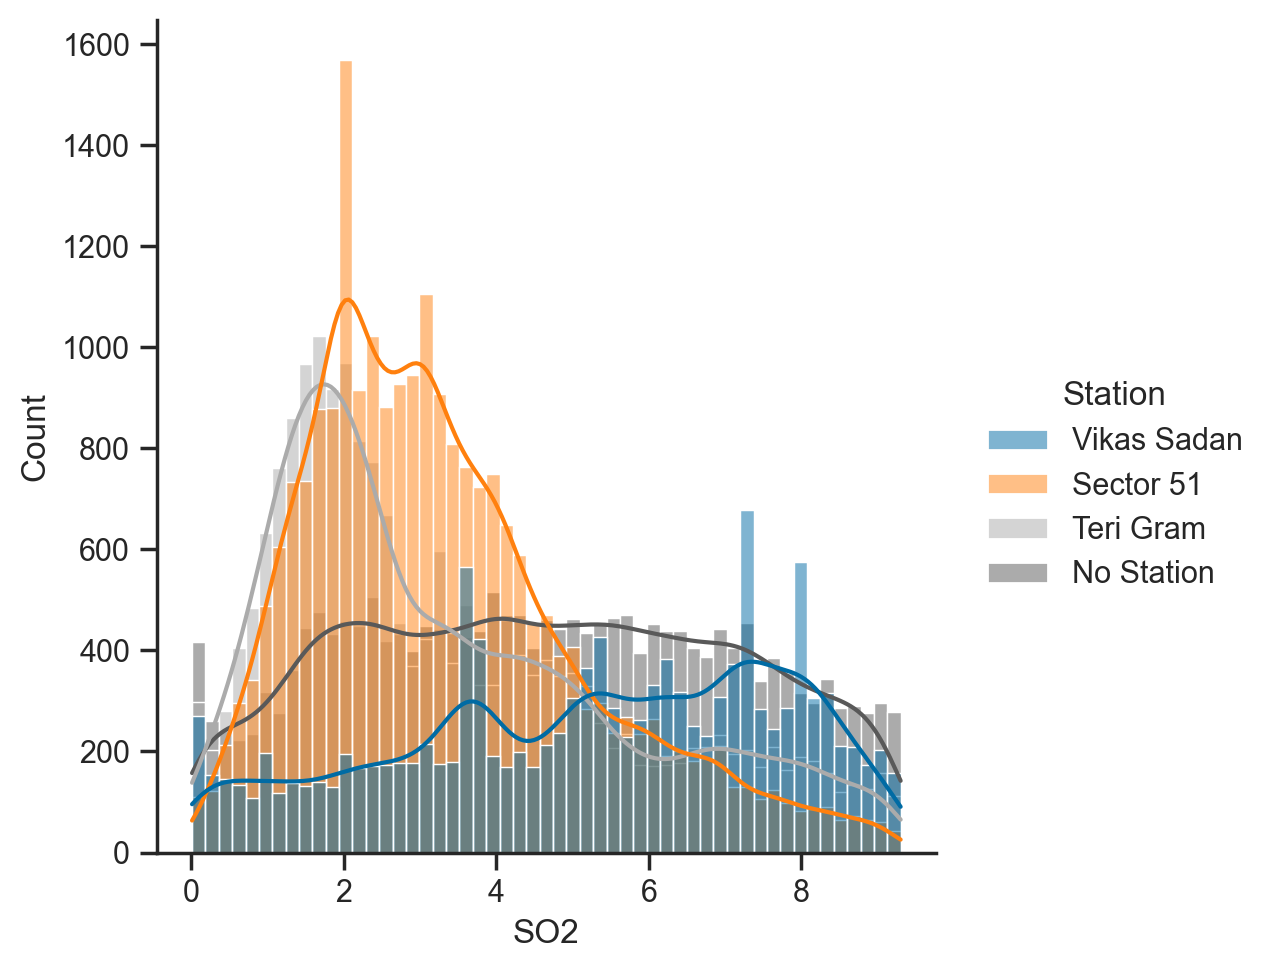

In [18]:
sns.boxplot(data = compiled[compiled['SO2'] < 9.31], x='SO2')
sns.displot(data = compiled[compiled['SO2'] < 9.31], x='SO2', kde=True, hue='Station')

- #### Now we don't have outliers & the graph is not skewed.

### Defining helper functions and useful columns for visualization

In [19]:
# We will not use these columns for training our model, just for visualization purpose

from datetime import datetime

temp1 = compiled['Datetime'][:107273].apply(lambda x : datetime.strptime(x, '%d-%m-%Y %H:%M'))
temp = compiled['Datetime'][107273:]
temp.apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
temp2 = compiled['Datetime'][107273:].apply(lambda x : datetime.strptime(x, '%Y-%m-%d %H:%M:%S'))
temp3 = pd.concat([temp1, temp2])
compiled['Datetime_2'] = temp3

compiled['Datetime'] = compiled['Datetime_2']

compiled.drop(['Datetime_2'], axis=1,inplace=True)

day =[]
month = []
year = []
week = []
hour = []
for i in range(compiled.shape[0]):
    day.append(compiled['Datetime'][i].day)
    month.append(compiled['Datetime'][i].month)
    year.append(compiled['Datetime'][i].year)
    week.append(compiled['Datetime'][i].week)
    hour.append(compiled['Datetime'][i].hour)
compiled['Day'] = day
compiled['Month'] = month
compiled['Year'] = year
compiled['Week'] = week
compiled['Hour'] = hour


107273   2015-11-27 15:00:00
107274   2015-11-27 16:00:00
107275   2015-11-27 17:00:00
107276   2015-11-27 18:00:00
107277   2015-11-27 19:00:00
                 ...        
147526   2020-06-30 20:00:00
147527   2020-06-30 21:00:00
147528   2020-06-30 22:00:00
147529   2020-06-30 23:00:00
147530   2020-07-01 00:00:00
Name: Datetime, Length: 40258, dtype: datetime64[ns]

In [21]:
from IPython.display import display, HTML

def helper_2(df, col):
    
    df_na = df[df[col].isna()]
    
    df_na.fillna(1).groupby(by=['Year', "Month", "Station"]).count()
    
    df_na_col_count = df_na.fillna(1).groupby(
        by=['Year', "Month", "Station"])[col].count().reset_index()
    
    df_na_col_count["Year_Month"] = df_na_col_count["Year"].map(
        str) + ", " + df_na_col_count["Month"].map(str)

    return df_na_col_count


### Plotting number of missing values with time (grouped by year & month)

In [22]:
for col in ["PM2.5", "NO", "NO2", "NOx", "CO", "PM10", "SO2"]:
    px.bar(data_frame = helper_2(compiled.copy(deep=True), col),
           x = "Year_Month",
           y = col,
           color="Station",
           text_auto = True,
           title = "No. of missing values in "+ col
           )

- ### Upto row 107273, it is 2020 to 2023 data (Has 4 stations)
- ### From row 107273, it is 2015 to 2020 data (Has no stations)

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='SO2'>

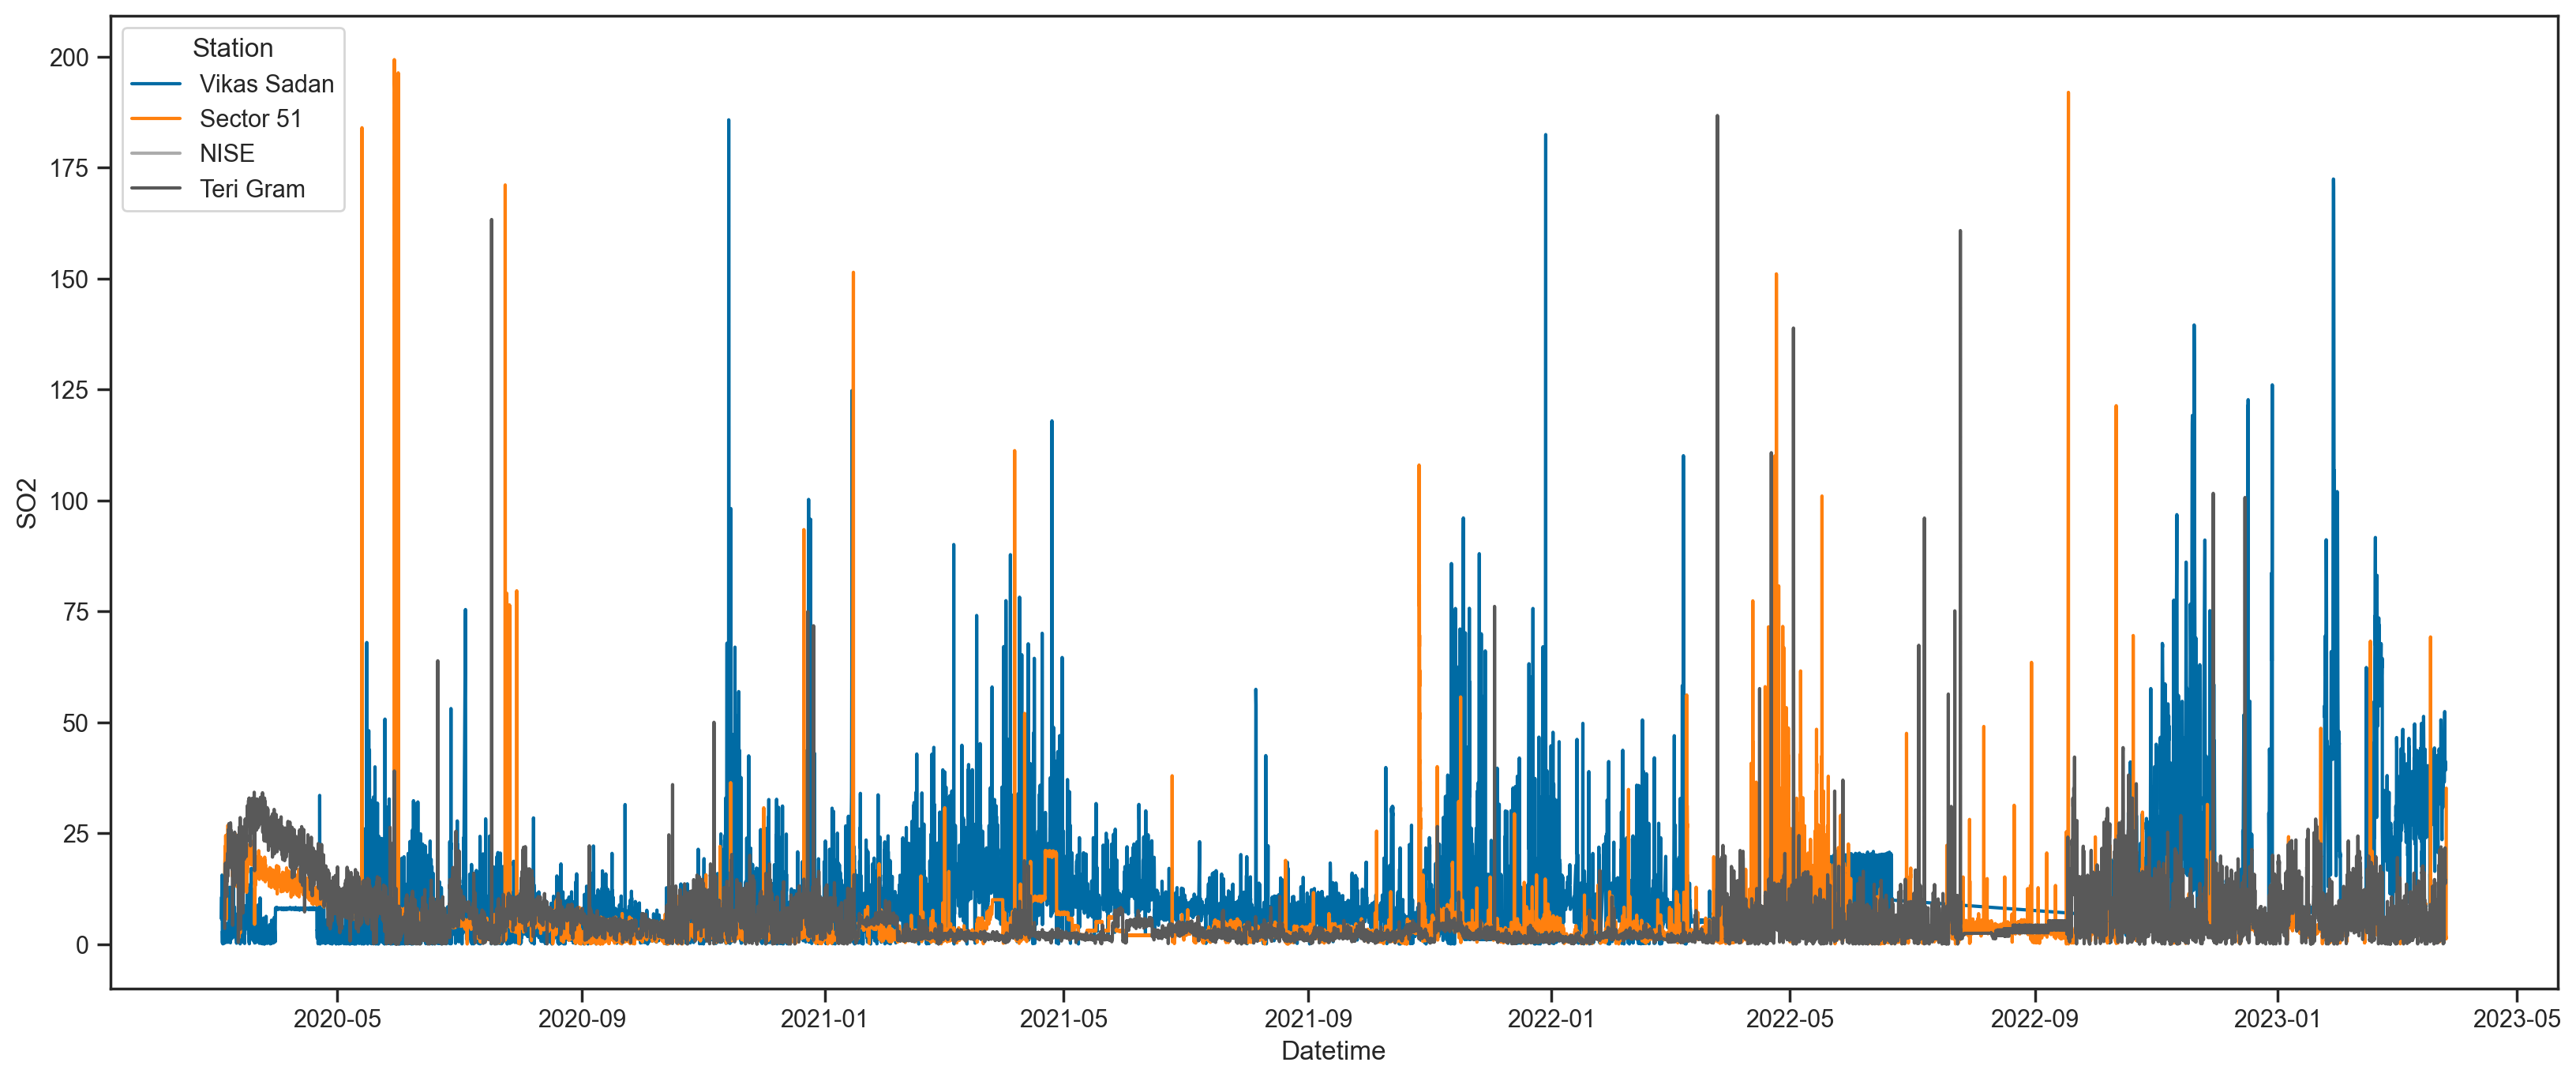

In [25]:
plt.figure(figsize=(20,8))
sns.lineplot(data=compiled[:107273], x="Datetime", y="SO2", hue="Station")

<Figure size 2000x800 with 0 Axes>

<AxesSubplot: xlabel='Datetime', ylabel='SO2'>

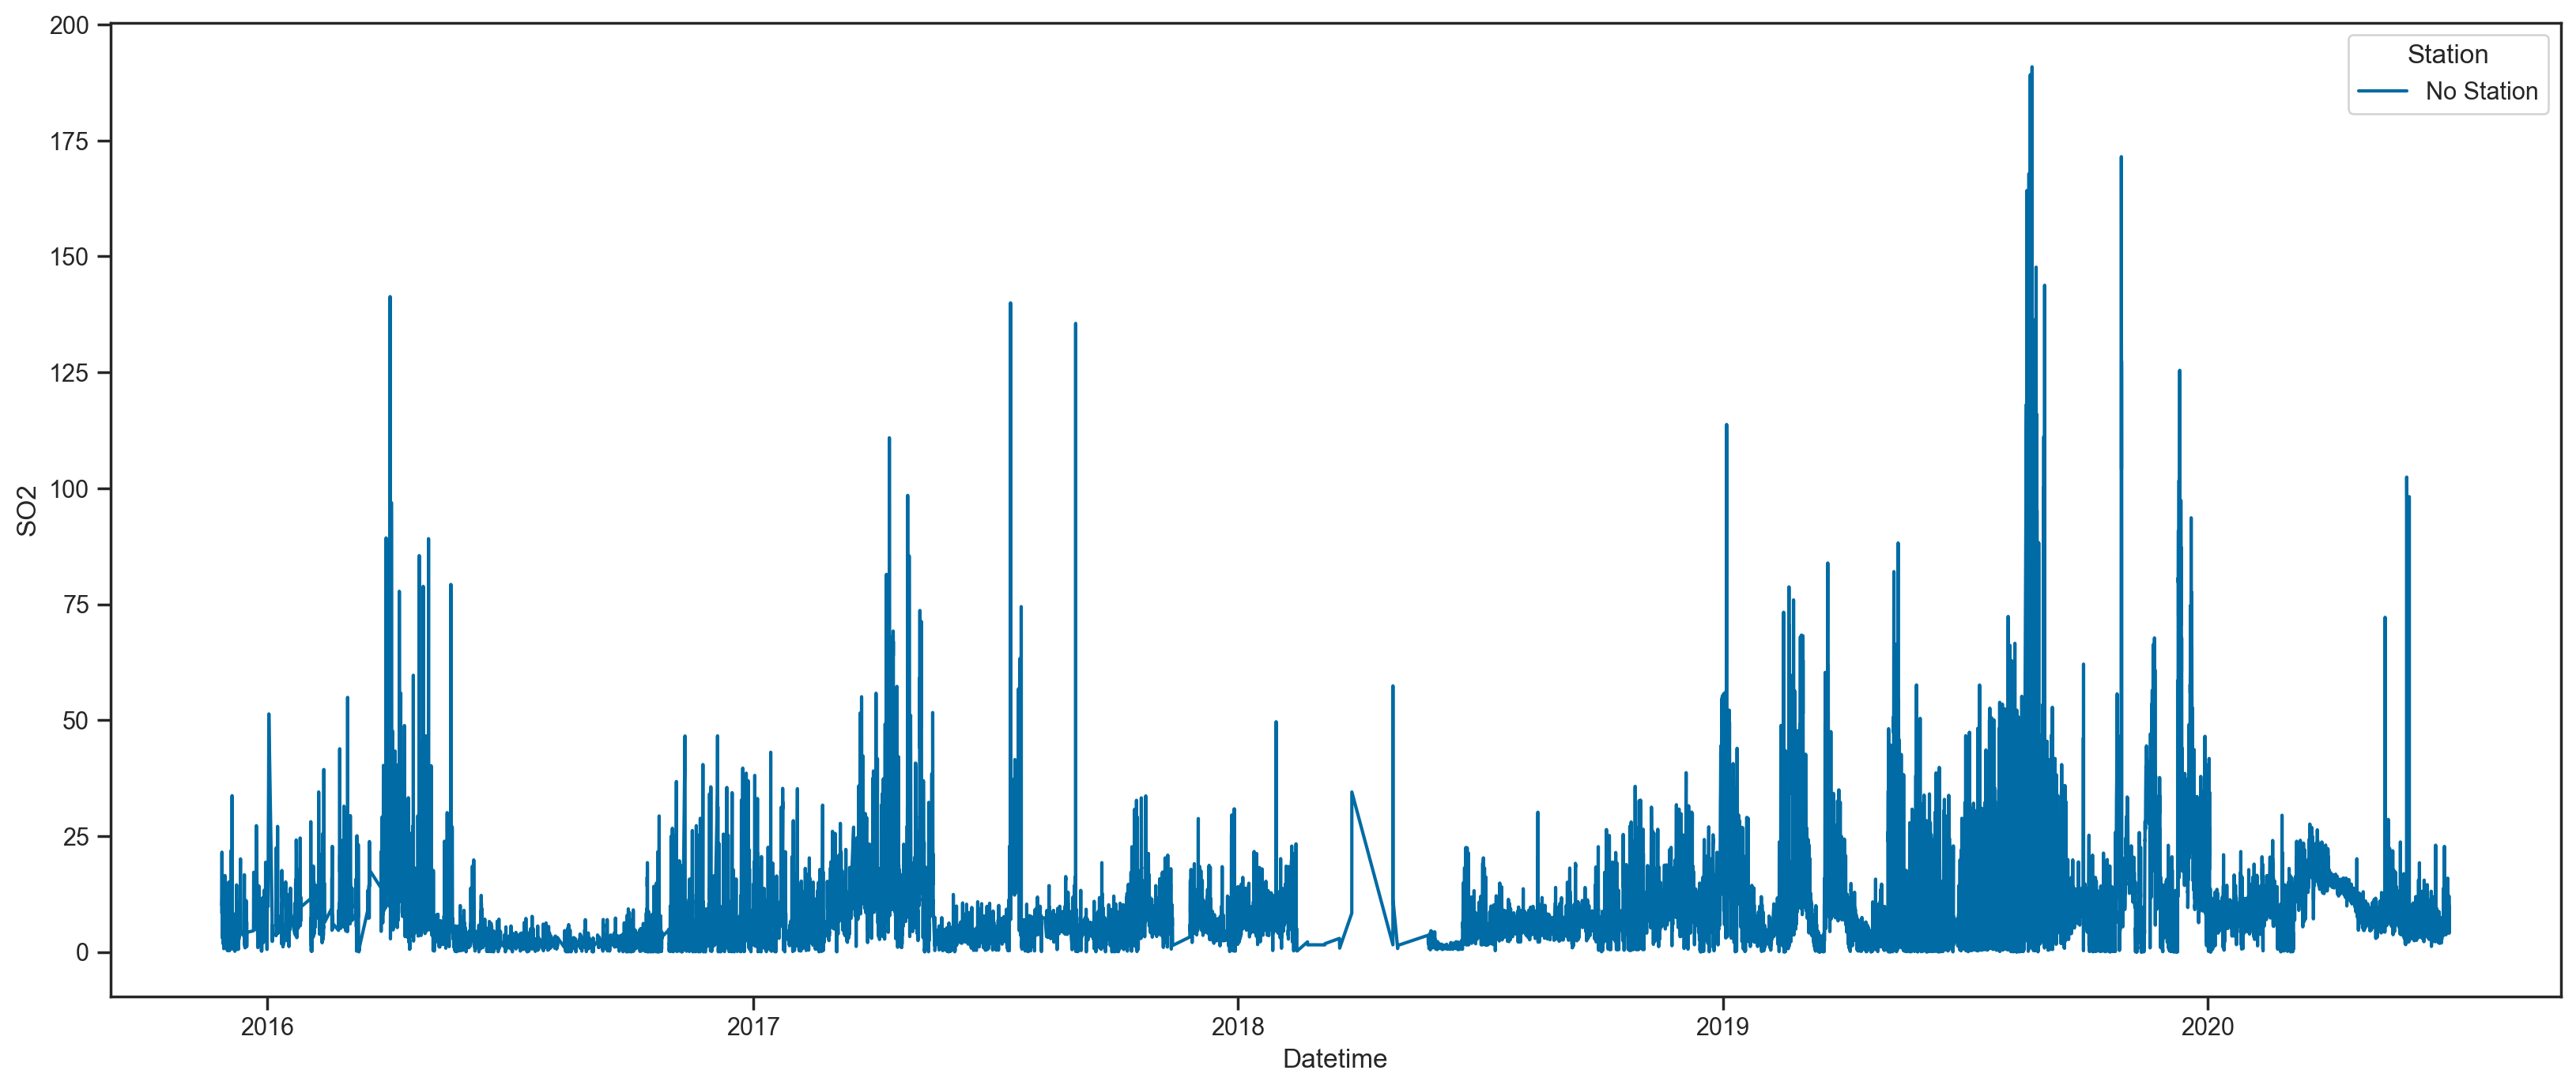

In [26]:
plt.figure(figsize=(20,8))
sns.lineplot(data=compiled[107273:], x="Datetime", y="SO2", hue="Station")

<AxesSubplot: title={'center': 'SO2'}, xlabel='[Station]'>

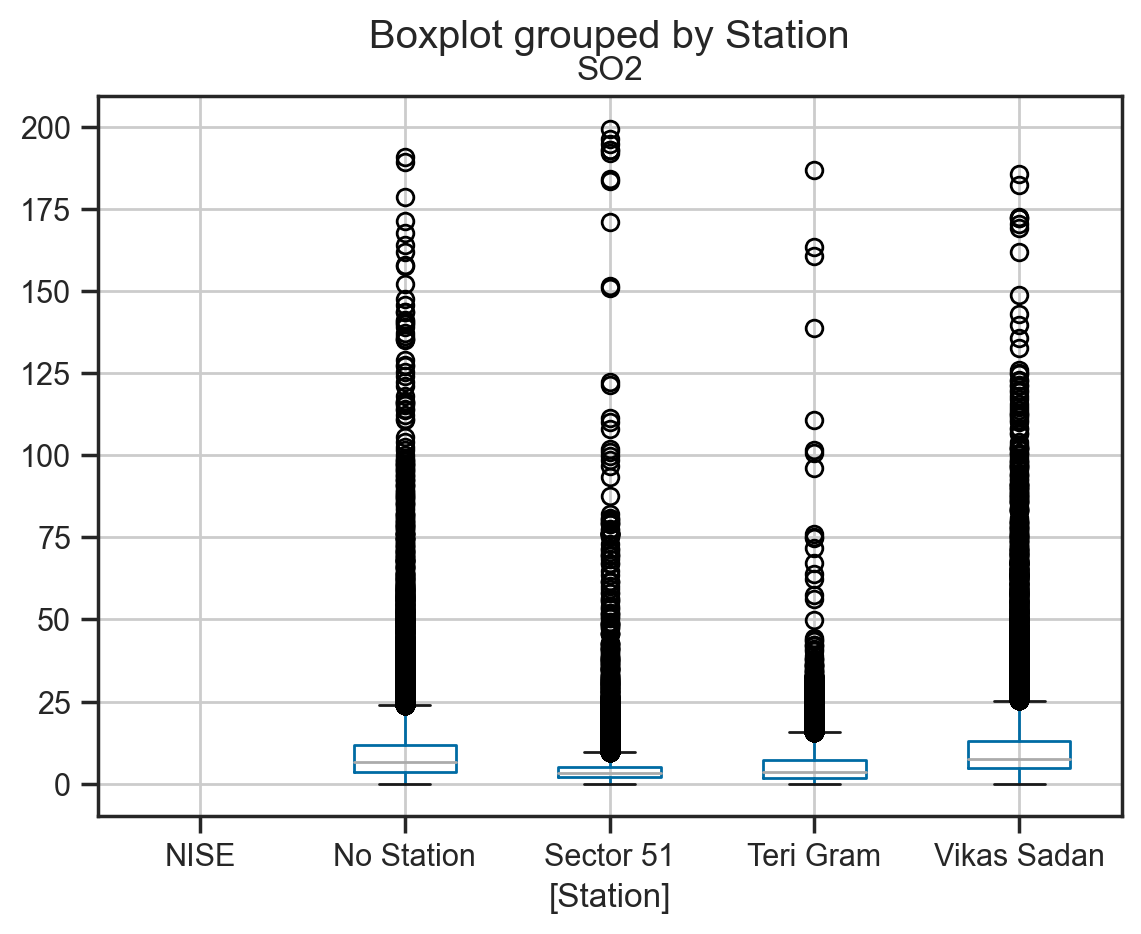

In [27]:
compiled.boxplot(column='SO2', by=['Station'])

## Next goal:
- Fill missing values in PM2.5, NO, NO2, NOx, CO, PM10, SO2
- Upto row 107273, there are no stations, so we can directly fill missing values by forward fill or backward fill.
- From row 107273, we have 4 stations. If you want to fill Vikas Sadan on 23rd March 2021, either use Vikas Sadan data from 22nd or 24th March 2021. 
    - Fill missing values by station.